# 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 다른 종목 sse: 삼성전자 lge:LG 전자
data = pd.read_csv('sse.csv') #, encoding='cp949') # cp949 가 더 최신
#data = s_data.tail(500)

In [2]:
data.drop('Adj Close', axis=1, inplace=True) 

In [3]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 0 to 5537
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5538 non-null   object 
 1   Open    5538 non-null   float64
 2   High    5538 non-null   float64
 3   Low     5538 non-null   float64
 4   Close   5538 non-null   float64
 5   Volume  5538 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 302.9+ KB


In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000


In [5]:
X_data = data[:-1][:]
y_data = pd.DataFrame(data['Close'][1:])

In [6]:
print(X_data.shape)
X_data

(5537, 6)


,Date,Open,High,Low,Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000
...,...,...,...,...,...,...
5532,2022-01-10,78100.0,78100.0,77100.0,78000.0,9947422
5533,2022-01-11,78400.0,79000.0,78000.0,78900.0,13221123
5534,2022-01-12,79500.0,79600.0,78600.0,78900.0,11000502
5535,2022-01-13,79300.0,79300.0,77900.0,77900.0,13889401


In [7]:
print(y_data.shape)
y_data.index = y_data.index-1 # index 조정
y_data

(5537, 1)


,Close
0,5580.0
1,5620.0
2,5540.0
3,5770.0
4,5770.0
...,...
5532,78900.0
5533,78900.0
5534,77900.0
5535,77300.0


#plt.figure(figsize=(16, 9))
#sns.lineplot(x=X_data.Date, y=X_data['Close'])
#plt.xlabel('time')
#plt.ylabel('price')
#plt.xticks([2000, 2005, 2010, 2015, 2020])
#plt.tick_params(axis='x', length=6, width=2, colors='r', grid_color='r', grid_alpha=0.5)
#plt.show()


In [8]:
# Train, Test 데이터 분리
from sklearn.model_selection import train_test_split

# shuffle=True가 default
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0, test_size=0.2, shuffle=False)

# 정규화 

In [9]:
# 하기전에 정규화 선택 0: 안한다, 1: MinMax, 2: StandardScaler 3: RobustScale
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()

# X_train 의 값을 기준으로 x_test 값도 조정 ?? 맞나??
fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

print(scaler.fit(X_train[fit_cols]))
X_train_scaled = scaler.transform(X_train[fit_cols])
X_test_scaled = scaler.transform(X_test[fit_cols])


StandardScaler()


In [10]:
X_train_scaled, X_test_scaled

(array([[-1.06094515, -1.05914657, -1.08657854, -1.04868813,  3.09119449],
        [-1.08222056, -1.06442221, -1.1015802 , -1.10501655,  3.12077178],
        [-1.08753941, -1.09396582, -1.09515092, -1.10076535,  1.88340403],
        ...,
        [ 3.40689062,  3.37134021,  3.42034766,  3.4097596 , -0.76738959],
        [ 3.37923259,  3.37345046,  3.40963219,  3.38850359, -0.93760541],
        [ 3.46007914,  3.45575053,  3.48464047,  3.47352762, -0.77533582]]),
 array([[ 3.47497193,  3.46630182,  3.48035428,  3.50966284, -0.8408907 ],
        [ 3.51326767,  3.57181472,  3.54036091,  3.60318928, -0.85501767],
        [ 3.62815487,  3.67099685,  3.66894654,  3.6754597 , -0.45569366],
        ...,
        [ 6.75776745,  6.69499663,  6.72928444,  6.68743607, -0.76266625],
        [ 6.73649205,  6.66334276,  6.65427616,  6.58115603, -0.58648929],
        [ 6.56628878,  6.53672728,  6.56855241,  6.51738801, -0.81778229]]))

# LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# 정규화 후
fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
model = LinearRegression().fit(X_train_scaled, y_train)

# model train 결과, w, b 출력,
print(f"model.coef_ 가중치(w): {model.coef_} \n model.intercept_ 상수항(b): {model.intercept_}")
print(f"model.score(X_train_scaled, y_train) : {model.score(X_train_scaled, y_train)}")

# KFold 한 결과
from sklearn.model_selection import cross_val_score

r2 = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\nr2: {r2}, \nr2.mean(): {r2.mean()}")

# 예측.
y_pred = model.predict(X_test_scaled)
#print(y_pred)

# 결정 계수 구하기.
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))


model.coef_ 가중치(w): [[-2.56467578e+03  2.76688673e+03  2.30382246e+03  6.90809499e+03
  -2.13007597e+00]] 
 model.intercept_ 상수항(b): [15986.89997742]
model.score(X_train_scaled, y_train) : 0.998831369810105

r2: [0.98165645 0.98955658 0.9829028  0.99414775 0.99458312], 
r2.mean(): 0.9885693407032417
0.99523372514538


In [13]:
# 정규화 없이
fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
model = LinearRegression().fit(X_train[fit_cols], y_train)

# model train 결과, w, b 출력,
print(f"model.coef_ 가중치(w): {model.coef_} \n model.intercept_ 상수항(b): {model.intercept_}")
print(f"model.score(X_train, y_train) : {model.score(X_train[fit_cols], y_train)}")

# KFold 한 결과
from sklearn.model_selection import cross_val_score

r2 = cross_val_score(model, X_train[fit_cols], y_train, cv=5)
print(f"\nr2: {r2}, \nr2.mean(): {r2.mean()}")

# 예측.
y_pred = model.predict(X_test[fit_cols])
#print(f"y_pred: {y_pred}, {y_pred.shape}")

# 결정 계수 구하기.
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))


model.coef_ 가중치(w): [[-2.72822624e-01  2.91942249e-01  2.46865378e-01  7.34192621e-01
  -1.29900804e-07]] 
 model.intercept_ 상수항(b): [2.66761447]
model.score(X_train, y_train) : 0.998831369810105

r2: [0.98165645 0.98955658 0.9829028  0.99414775 0.99458312], 
r2.mean(): 0.9885693407032505
0.9952337251453829


In [14]:
test_conf = X_test
#test_conf.drop('Volume', axis=1, inplace=True)
test_conf['nClose'] = y_pred

In [15]:
test_conf

,Date,Open,High,Low,Close,Volume,nClose
4429,2017-07-11,48640.0,49000.0,48280.0,49000.0,9717800,48930.581909
4430,2017-07-12,49000.0,50000.0,48840.0,49880.0,9486150,49908.672223
4431,2017-07-13,50080.0,50940.0,50040.0,50560.0,16034150,50683.088349
4432,2017-07-14,51000.0,51080.0,50420.0,50480.0,8239000,50509.049480
4433,2017-07-17,50900.0,51020.0,50520.0,50640.0,8976100,50660.876814
...,...,...,...,...,...,...,...
5532,2022-01-10,78100.0,78100.0,77100.0,78000.0,9947422,77794.963225
5533,2022-01-11,78400.0,79000.0,78000.0,78900.0,13221123,78858.391404
5534,2022-01-12,79500.0,79600.0,78600.0,78900.0,11000502,78881.859555
5535,2022-01-13,79300.0,79300.0,77900.0,77900.0,13889401,77941.467749


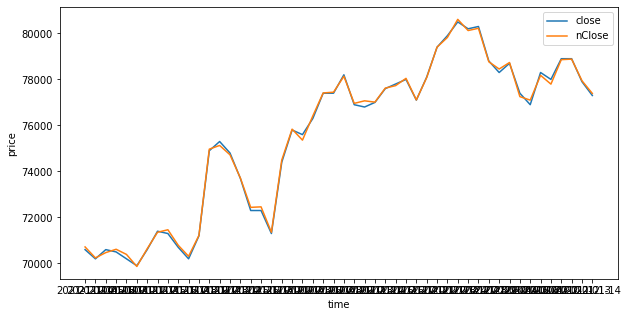

In [16]:
plt.figure(figsize=(10, 5))
#sns.lineplot(x=test_conf.Date, y=[test_conf['Close'], test_conf['nClose']])
#sns.lineplot(x='Date', y='Close', data=test_conf[-10:])
#sns.lineplot(x='Date', y='nClose', data=test_conf[-10:], alpha=0.6)

plt.plot(test_conf.Date[-50:], test_conf.Close[-50:], label='close')
plt.plot(test_conf.Date[-50:], test_conf.nClose[-50:], label='nClose')
plt.xlabel('time')
plt.ylabel('price')
plt.legend() #loc='best', ncol=2)
plt.show()


# VIF 확인

In [17]:
from statsmodels.formula.api import ols

formula = 'nClose ~ Open + High + Low + Close + Volume'
r_model = ols(formula, test_conf)

res = r_model.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nClose   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.044e+28
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:04:11   Log-Likelihood:                 21600.
No. Observations:                1108   AIC:                        -4.319e+04
Df Residuals:                    1102   BIC:                        -4.316e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6676   1.08e-10   2.46e+10      0.000       2.668       2.668
Open          -0.2728   6.77e-14  -4.03e+12      0.000      -0.273      -0.273
High           0.2919   7.82e-14   3.73e+12      0.000       0.292       0.292
Low            0.2469   8.76e-14   2.82e+12      0.000       0.247       0.247
Close          0.7342   6.81e-14   1.08e+13      0.000       0.734       0.734
Volume     -1.299e-07   4.28e-18  -3.03e+10      0.000    -1.3e-07    -1.3e-07
==============================================================================
Omnibus:                      632.241   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6103.802
Skew:                          -2.486   Prob(JB):                         0.00
Kurtosis:                      13.368   Cond. No.                     7.73e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from patsy import dmatrices
y, X = dmatrices(formula, test_conf, return_type="dataframe")
vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif

,VIF Factor,features
0,18.948440,Intercept
1,1386.856370,Open
2,1874.553039,High
3,2290.851304,Low
4,1399.278911,Close
5,2.225351,Volume


# 정규화 선형회귀 (Ridge, Lasso, Elastic-net)
- w, b에 제약(정규화)을 주어 과적, 과소 적합을 줄이기 위한 방법

In [19]:
# Ridge Regression 모델
fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # Hyper parameter
ridge.fit(X_train[fit_cols], y_train)
print(ridge.score(X_test[fit_cols], y_test))

# Lasso Regression 모델
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0) # Hyper param
lasso.fit(X_train[fit_cols], y_train)
print(lasso.score(X_test[fit_cols], y_test))

# Elastic-net Regression 모델
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5) # Hyper param  l1, l2 : l1에 값 주면 l2도 같은값, l2만 주면 l2만 쓰는것
elastic.fit(X_train[fit_cols], y_train)
print(elastic.score(X_test[fit_cols], y_test))

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train[fit_cols], y_train)
model.fit(X_train[fit_cols], y_train)

import numpy as np
# 계수를 한 눈에 비교하기위한 DataFrame
coefs = np.vstack((model.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=['Open', 'High', 'Low', 'Close', 'Volume'], index=index)
print("정규화 선형회귀 모댈별 가중치(계수) 비교")
coefs_df

0.9952337251452181
0.9940884007115441
0.9940884183538544
정규화 선형회귀 모댈별 가중치(계수) 비교


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.802e+08, tolerance: 3.931e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.802e+08, tolerance: 3.931e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,Open,High,Low,Close,Volume
linear,-0.272823,0.291942,0.246865,0.734193,-1.299008e-07
ridge,-0.272823,0.291942,0.246865,0.734193,-1.299008e-07
lasso,0.405039,0.318162,0.002191,0.273129,-4.773671e-07
elastic,0.405038,0.318163,0.002183,0.273136,-4.773908e-07


In [20]:
from sklearn.model_selection import GridSearchCV
params = {"alpha":[0.0001, 0.001, 0.01, 0, 1], "max_iter":[10, 50, 100, 150, 200]}

#  ridge, lasso, elastic
hyper_param_tune = GridSearchCV(ridge, params, cv=5)
hyper_param_tune.fit(X_train[fit_cols], y_train)
hyper_param_tune.best_params_

{'alpha': 0, 'max_iter': 10}


# SVC: linear, poly, rbf

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier


In [22]:
estimator = SVC(kernel='rbf')  # rbf', 'poly', 'linear=너무 오래걸림'
#model2 = SVC(kernel='poly', random_state=0, gamma=10, C=1.0).fit(X_test[fit_cols], y_test)
#model3 = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0).fit(X_test[fit_cols], y_test)

n_estimators = 10
n_jobs = -1

model = BaggingClassifier(base_estimator=estimator,
                          n_estimators=n_estimators,
                          max_samples=1./n_estimators,
                          n_jobs=n_jobs)
model.fit(X_train[fit_cols], y_train)
y_pred = model.predict(X_test[fit_cols])
model.predict_proba(X_test[fit_cols])

from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_pred, y_test)

print(f"y_pred: {y_pred}")
print(f"y_test: {list(y_test)}")
print(f"정확도 : {accuracy_score(y_test, y_pred)}")


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


y_pred: [6850. 6850. 6850. ... 6850. 6850. 6850.]
y_test: ['Close']
정확도 : 0.0


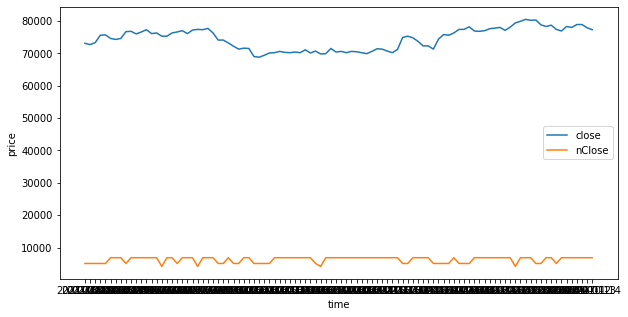

In [23]:
test_conf = X_test
#test_conf.drop('Volume', axis=1, inplace=True)
test_conf['nClose'] = y_pred

plt.figure(figsize=(10, 5))
#sns.lineplot(x=test_conf.Date, y=[test_conf['Close'], test_conf['nClose']])
#sns.lineplot(x='Date', y='Close', data=test_conf[-10:])
#sns.lineplot(x='Date', y='nClose', data=test_conf[-10:], alpha=0.6)

plt.plot(test_conf.Date[-100:], test_conf.Close[-100:], label='close')
plt.plot(test_conf.Date[-100:], test_conf.nClose[-100:], label='nClose')
# plt.plot(test_conf.Date, test_conf.Close, label='close')
# plt.plot(test_conf.Date, test_conf.nClose, label='nClose')
plt.xlabel('time')
plt.ylabel('price')
plt.legend() #loc='best', ncol=2)
plt.show()


# Logistic Regression

- 금일 종가와 익일 종가를 비교 상승, 하락, =(0, 1, 2) label(target)을 만든다.

In [24]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000


In [25]:
# X_data에 마지막 행 전까지의 데이터를, y_data에 익일부터의 종가를 입력
X_data = data[:-1][:]
y_data = pd.DataFrame(data['Close'][1:])
y_data.index = y_data.index-1

# target_data 에 금일 종가, 다음날 종가를 넣는다
t_data = pd.DataFrame(X_data.Close)
t_data['n_close'] = y_data

def up_down(cp, ncp):
    if cp > ncp:
        return 0
    elif cp == ncp:
        return 1
    else:
        return 2

# t_data.up_down 에 금일 종가와 익일 종가 비교 0: 하락, 1:= 2:상승을 넣은 target data를 만들고
# 금일, 익일 종가 drop, 타입을 int로 변경(안하니 에러가...)
t_data['up_down'] = t_data.apply( lambda row: up_down(row['Close'], row['n_close']), axis=1 )
t_data.drop(["Close", "n_close"], axis=1, inplace=True)
t_data = t_data.astype('int')
t_data


,up_down
0,0
1,2
2,0
3,2
4,1
...,...
5532,2
5533,1
5534,0
5535,0


In [26]:
# 데이터 분리
from sklearn.model_selection import train_test_split

fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

X_train, X_test, y_train, y_test = train_test_split(X_data[fit_cols], t_data, shuffle=False, random_state=55)


# 정규화

In [27]:
# 정규화
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()

# X_train 의 값을 기준으로 x_test 값도 조정 ?? 맞나??
fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

print(scaler.fit(X_train[fit_cols]))
X_train_scaled = scaler.transform(X_train[fit_cols])
X_test_scaled = scaler.transform(X_test[fit_cols])


StandardScaler()


In [28]:
# 학습 Model 생성 및 학습
from sklearn.linear_model import LogisticRegression

mdoel_reg = LogisticRegression() #solver="liblinear") 
mdoel_reg.fit(X_train_scaled, y_train) #[fit_cols] 


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
# 결과
from sklearn.metrics import accuracy_score

predict = mdoel_reg.predict(X_test_scaled) #[fit_cols]
print(f"예측 결과: {predict}")
accuracy_score(y_test, predict)

예측 결과: [0 0 0 ... 0 0 0]


0.4483754512635379

In [30]:
show_data = X_data
show_data['up_down'] = t_data
show_data

,Date,Open,High,Low,Close,Volume,up_down
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000,0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000,2
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000,0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000,2
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000,1
...,...,...,...,...,...,...,...
5532,2022-01-10,78100.0,78100.0,77100.0,78000.0,9947422,2
5533,2022-01-11,78400.0,79000.0,78000.0,78900.0,13221123,1
5534,2022-01-12,79500.0,79600.0,78600.0,78900.0,11000502,0
5535,2022-01-13,79300.0,79300.0,77900.0,77900.0,13889401,0


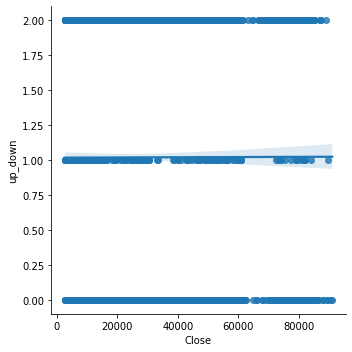

In [31]:
from seaborn import lmplot

lmplot(x="Close", y="up_down", data=show_data)
plt.show()

# 정규화 없이

In [32]:
# 데이터 분리
from sklearn.model_selection import train_test_split

fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

X_train, X_test, y_train, y_test = train_test_split(X_data[fit_cols], t_data, shuffle=False, random_state=55) #[fit_cols]


In [33]:
# 학습 model 생성 및 학습
mdoel_reg = LogisticRegression() #solver="liblinear") 
mdoel_reg.fit(X_train[fit_cols], y_train) #[fit_cols]


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
predict = mdoel_reg.predict(X_test[fit_cols])
print(f"예측 결과: {predict}")
accuracy_score(y_test, predict)

예측 결과: [2 2 2 ... 2 2 2]


0.5068592057761733

# KNeighborsClassifier

In [35]:
# X_data: 전체 데이터에서 마지막 행(최근)을 제외한 전체 데이터를 저장
# y_data: 다음날 종가 계산을 위해 1번째 행 부터 끝행 까지의 종가 저장
# t_data: 당일 종가 와 익일 종가를 하나의 df로 만들어 비교후 upDown(0:하락, 1:=, 2:상승) 만 남긴다
# 
X_data = data[:-1][:]
y_data = pd.DataFrame(data['Close'][1:])
y_data.index = y_data.index-1

# target_data 에 금일 종가, 다음날 종가를 넣는다
t_data = pd.DataFrame(X_data.Close)
t_data['n_close'] = y_data

def up_down(cp, ncp):
    if cp > ncp:
        return 0
    elif cp == ncp:
        return 1
    else:
        return 2

# t_data.up_down 에 금일 종가와 익일 종가 비교 0: 하락, 1:= 2:상승을 넣은 target data를 만들고
# 금일, 익일 종가 drop, 타입을 int로 변경
t_data['up_down'] = t_data.apply( lambda row: up_down(row['Close'], row['n_close']), axis=1 )
t_data.drop(["Close", "n_close"], axis=1, inplace=True)
t_data = t_data.astype('int')
t_data


,up_down
0,0
1,2
2,0
3,2
4,1
...,...
5532,2
5533,1
5534,0
5535,0


In [36]:
X_data.drop('Date', axis=1, inplace=True)

In [37]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, t_data, shuffle=False, random_state=55)

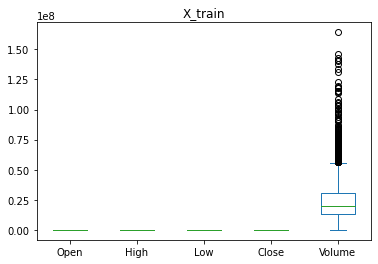

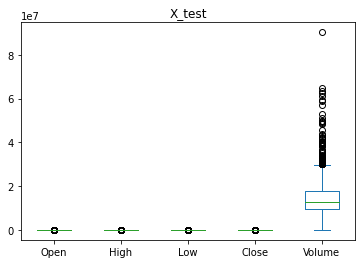

In [38]:
import matplotlib.pyplot as plt
X_train.plot(kind="box")
plt.title("X_train")
plt.show()
X_test.plot(kind="box")
plt.title("X_test")
plt.show()


In [39]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
X_test_scaled

array([[0.80618557, 0.80428769, 0.80728802, 0.79576242, 0.08369851],
       [0.80412371, 0.80152144, 0.80798879, 0.79437305, 0.06281613],
       [0.79243986, 0.80359613, 0.80378416, 0.80270927, 0.38076729],
       ...,
       [2.64467354, 2.65698479, 2.66923616, 2.64571032, 0.06698841],
       [2.63780069, 2.64661134, 2.64470918, 2.61097603, 0.08458059],
       [2.58281787, 2.60511757, 2.61667835, 2.59013546, 0.06148479]])

In [41]:
# Model 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=10)
model_KNN.fit(X_train_scaled, y_train)


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [42]:
# 예측 및 평가

from sklearn.metrics import accuracy_score

predict = model_KNN.predict(X_test_scaled)
accuracy_score(y_test, predict)

0.45126353790613716

# Decision Tree

In [43]:
# X_data: 전체 데이터에서 마지막 행(최근)을 제외한 전체 데이터를 저장
# y_data: 다음날 종가 계산을 위해 1번째 행 부터 끝행 까지의 종가 저장
# t_data: 당일 종가 와 익일 종가를 하나의 df로 만들어 비교후 upDown(0:하락, 1:=, 2:상승) 만 남긴다
# 

X_data = data[:-1][:]
y_data = pd.DataFrame(data['Close'][1:])
y_data.index = y_data.index-1

# target_data 에 금일 종가, 다음날 종가를 넣는다
t_data = pd.DataFrame(X_data.Close)
t_data['n_close'] = y_data

def up_down(cp, ncp):
    if cp > ncp:
        return 0
    elif cp == ncp:
        return 1
    else:
        return 2

# t_data.up_down 에 금일 종가와 익일 종가 비교 0: 하락, 1:= 2:상승을 넣은 target data를 만들고
# 금일, 익일 종가 drop, 타입을 int로 변경
t_data['up_down'] = t_data.apply( lambda row: up_down(row['Close'], row['n_close']), axis=1 )
t_data.drop(["Close", "n_close"], axis=1, inplace=True)
t_data = t_data.astype('int')

X_data.drop("Date", axis=1, inplace=True)

In [44]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_data, t_data, shuffle=False, random_state=55)


In [45]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [46]:
# Model 생성 및 학습
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(max_depth=10)
model_dtree.fit(X_train_scaled, y_train)

print(f"정확도: {model_dtree.score(X_test_scaled, y_test)}")


정확도: 0.4433212996389892


feature 중요도: [0.10416315 0.14655061 0.17266095 0.18295    0.39367529]


(-1.0, 5.0)

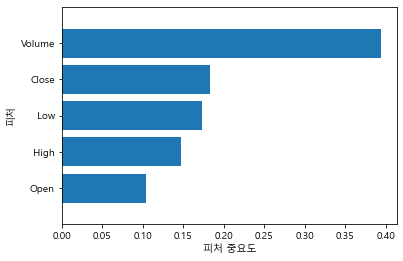

In [47]:
import matplotlib.pyplot as plt

print(f"feature 중요도: {model_dtree.feature_importances_}")
plt.rcParams['font.family'] = "Malgun Gothic"

n_features = X_train_scaled.shape[1]
plt.barh(np.arange(n_features), model_dtree.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel("피처")
plt.ylim(-1, n_features)


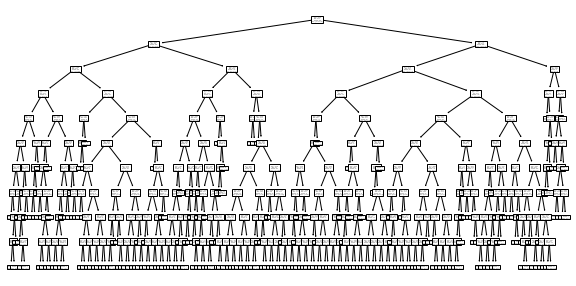

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 5))
plot_tree(model_dtree.fit(X_train_scaled, y_train))
plt.show()

# RandomForest

In [49]:
X_data = data[:-1][:]
y_data = pd.DataFrame(data['Close'][1:])
y_data.index = y_data.index-1

# target_data 에 금일 종가, 다음날 종가를 넣는다
t_data = pd.DataFrame(X_data.Close)
t_data['n_close'] = y_data

def up_down(cp, ncp):
    if cp > ncp:
        return 0
    elif cp == ncp:
        return 1
    else:
        return 2

# t_data.up_down 에 금일 종가와 익일 종가 비교 0: 하락, 1:= 2:상승을 넣은 target data를 만들고
# 금일, 익일 종가 drop, 타입을 int로 변경
t_data['up_down'] = t_data.apply( lambda row: up_down(row['Close'], row['n_close']), axis=1 )
t_data.drop(["Close", "n_close"], axis=1, inplace=True)
t_data = t_data.astype('int')

X_data.drop("Date", axis=1, inplace=True)


In [50]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_data_scaled = scaler.fit_transform(X_data)


In [51]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_data_scaled, t_data, shuffle=False, random_state=55)


# 정규화 않은 데이터
X_train, X_test, y_train, y_test = train_test_split(X_data, t_data)

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)


c:\ai_source\machinelearning\venv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [53]:
predict = model_rf.predict(X_test)
print(predict)
print(list(y_test))

[0 2 2 ... 0 0 0]
['up_down']


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.45      0.94      0.61       621
           1       0.00      0.00      0.00        62
           2       0.55      0.07      0.13       702

    accuracy                           0.46      1385
   macro avg       0.33      0.34      0.25      1385
weighted avg       0.48      0.46      0.34      1385



c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


feature 중요도: [0.10846995 0.14366545 0.16978722 0.1796347  0.39844268]


(-1.0, 5.0)

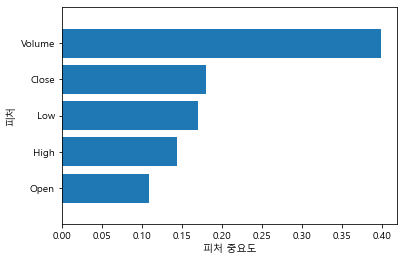

In [55]:
import matplotlib.pyplot as plt

print(f"feature 중요도: {model_dtree.feature_importances_}")
plt.rcParams['font.family'] = "Malgun Gothic"

n_features = X_train_scaled.shape[1]
plt.barh(np.arange(n_features), model_dtree.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel("피처")
plt.ylim(-1, n_features)

# K-Means Clustering

In [61]:
X_data = data[:-1][:]
y_data = pd.DataFrame(data['Close'][1:])
y_data.index = y_data.index-1

# target_data 에 금일 종가, 거래량, 다음날 종가를 넣는다
t_data = X_data[['Close', 'Volume']]
t_data['n_close'] = y_data

def up_down(cp, ncp):
    if cp > ncp:
        return 0
    elif cp == ncp:
        return 1
    else:
        return 2

# t_data.up_down 에 금일 종가와 익일 종가 비교 0: 하락, 1:= 2:상승을 넣은 target data를 만들고
# 금일, 익일 종가 drop, 타입을 int로 변경
t_data['up_down'] = t_data.apply( lambda row: up_down(row['Close'], row['n_close']), axis=1 )
t_data = t_data.astype('int')

t_data


c:\ai_source\machinelearning\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\ai_source\machinelearning\venv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Close,Volume,n_close,up_down
0,6110,74195000,5580,0
1,5580,74680000,5620,2
2,5620,54390000,5540,0
3,5540,40305000,5770,2
4,5770,46880000,5770,1
...,...,...,...,...
5532,78000,9947422,78900,2
5533,78900,13221123,78900,1
5534,78900,11000502,77900,0
5535,77900,13889401,77300,0


c:\ai_source\machinelearning\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


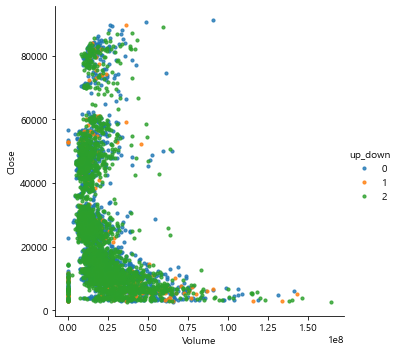

In [68]:
sns.lmplot('Volume', 'Close', data=t_data, hue='up_down', fit_reg=False, scatter_kws={"s": 10})

In [80]:
from sklearn.cluster import KMeans
fit_cols = ['Close', 'Volume']

model_km = KMeans(n_clusters=3, init='random', random_state=55)
model_km.fit(t_data[fit_cols])


KMeans(init='random', n_clusters=3, random_state=55)

In [71]:
# predict = model_km.predict(t_data[fit_cols])


In [81]:
print(model_km.cluster_centers_)
print(model_km.labels_)

[[8.55317610e+03 6.64725421e+07]
 [1.56796520e+04 3.18145767e+07]
 [2.93607175e+04 1.35613726e+07]]
[0 0 0 ... 2 2 2]


c:\ai_source\machinelearning\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


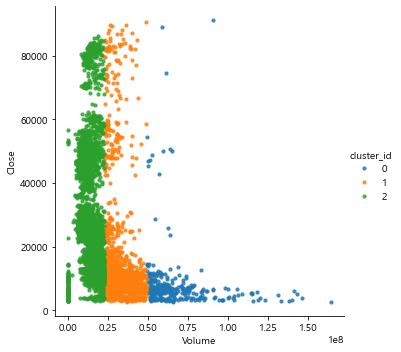

In [82]:
t_data['cluster_id'] = model_km.labels_

sns.lmplot('Volume', 'Close', data=t_data, fit_reg=False, scatter_kws={"s":10}, hue='cluster_id')

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

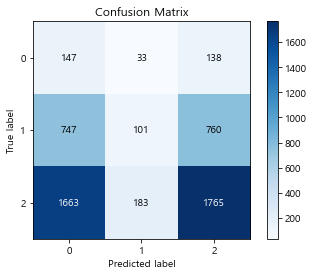

In [93]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(t_data['cluster_id'], t_data['up_down'])

# HierarchicalClustering

In [111]:
X_data = data[5000:-1][:]
y_data = pd.DataFrame(data['Close'][5001:])
y_data.index = y_data.index-1

# target_data 에 금일 종가, 다음날 종가를 넣는다
t_data = pd.DataFrame(X_data['Close'])
t_data['n_close'] = y_data

def up_down(cp, ncp):
    if cp > ncp:
        return 0
    elif cp == ncp:
        return 1
    else:
        return 2

# t_data.up_down 에 금일 종가와 익일 종가 비교 0: 하락, 1:= 2:상승을 넣은 target data를 만들고
# 금일, 익일 종가 drop, 타입을 int로 변경
t_data['up_down'] = t_data.apply( lambda row: up_down(row['Close'], row['n_close']), axis=1 )
t_data.drop(["Close", "n_close"], axis=1, inplace=True)
t_data = t_data.astype('int')

t_data


,up_down
5000,2
5001,0
5002,1
5003,0
5004,0
...,...
5532,2
5533,1
5534,0
5535,0


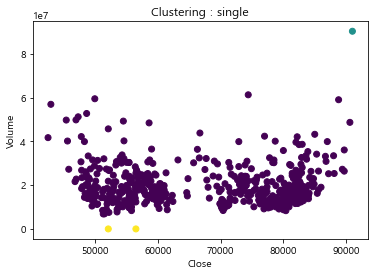

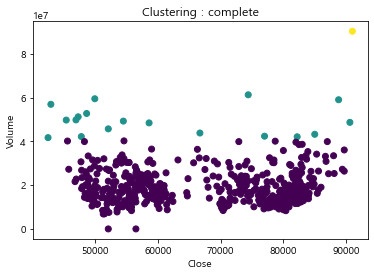

In [112]:
# Scikit-learn 패키지 사용
from sklearn.cluster import AgglomerativeClustering

fit_cols = ['Close', 'Volume'] #'Open', 'High', 'Low', 'Close', 'Volume'
linkage = ['single', 'complete']
for idx, i in enumerate(linkage):
    plt.figure(idx)
    model_hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i)
    
    model_hier.fit(X_data[fit_cols])
    plt.scatter(X_data['Close'], X_data['Volume'], c=model_hier.labels_)
    plt.title('Clustering : ' + i)
    plt.xlabel('Close')
    plt.ylabel('Volume')
plt.show()


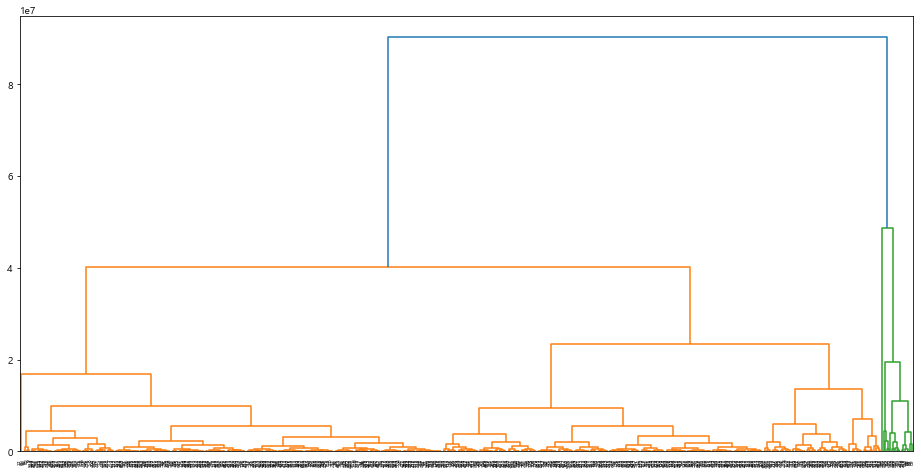

In [117]:
from scipy.cluster.hierarchy import linkage, dendrogram

fit_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
clust_complete = linkage(X_data[fit_cols], method='complete')
plt.figure(figsize=(16, 8))
dg = dendrogram(clust_complete)
plt.show()

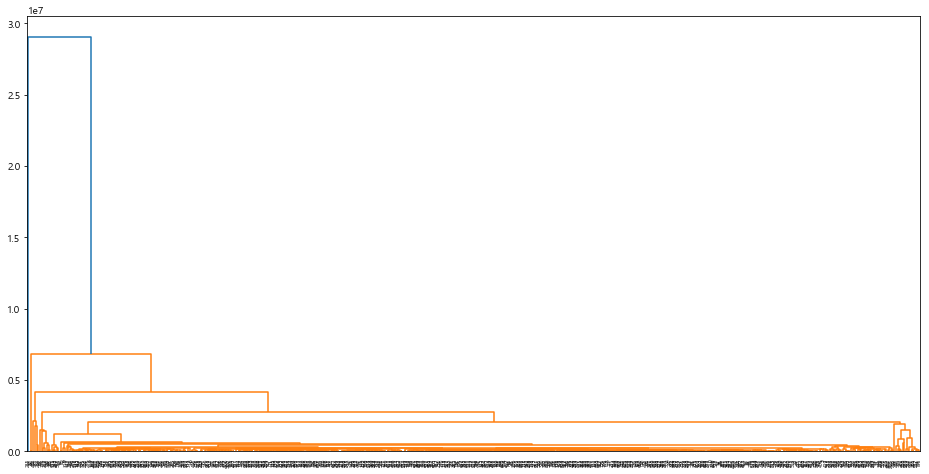

In [118]:
clust_single = linkage(X_data[fit_cols], method='single')
plt.figure(figsize=(16, 8))
dendrogram(clust_single)
plt.show()

In [129]:
from scipy.cluster.hierarchy import fcluster

# clustering : linkage()명령을 수행한 데이터. 
#clustering = linkage(df, method='complete')

predict = fcluster(clust_complete, 30000000, criterion='distance')
predict


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

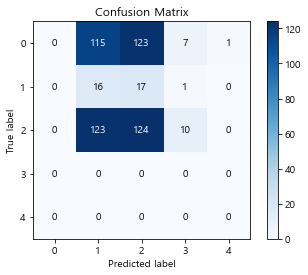

In [130]:
skplt.metrics.plot_confusion_matrix(t_data['up_down'], predict)